Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

Решением будет ссылка на гитхаб с ноутбуком.

In [152]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [153]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [154]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

In [178]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

In [155]:
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
        
    print('Results of Dickey-Fuller Test:')
    
    if dftest[0]> dftest[4]['5%']: 
        print('Eсть единичные корни, ряд не стационарен')
    else:
        print('Eдиничных корней нет, ряд стационарен')
            
    print(dfoutput)

In [156]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Results of Dickey-Fuller Test:
Eсть единичные корни, ряд не стационарен
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
Results of Dickey-Fuller Test:
Eсть единичные корни, ряд не стационарен
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64
Results of Dickey-Fuller Test:
Eсть единичные корни, ряд не стационарен
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Criti

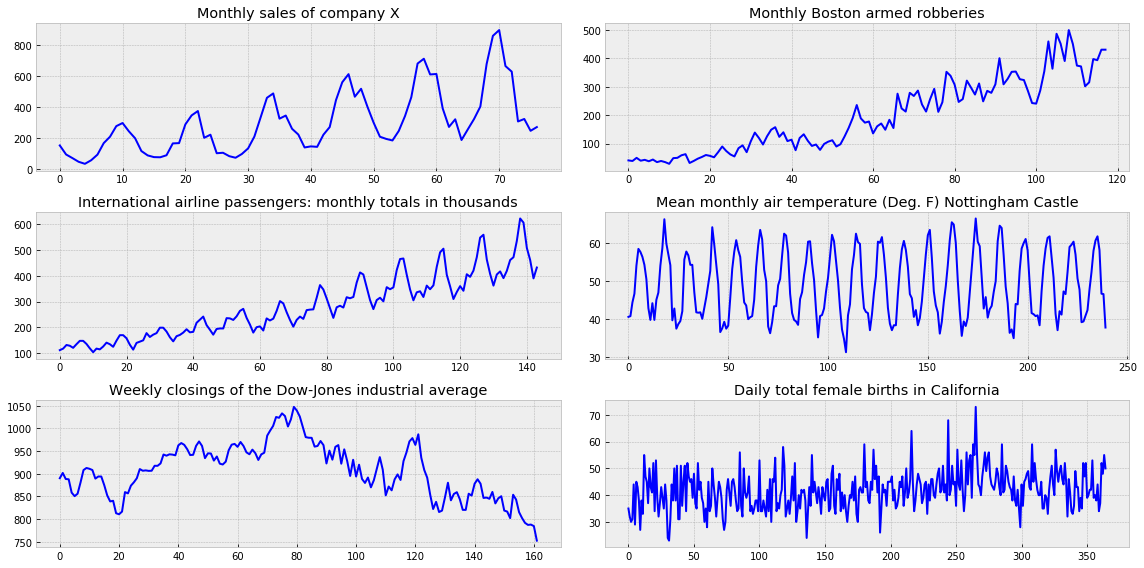

In [157]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
        test_stationarity(all_series[key])
        
    plt.tight_layout()

Из результата анализа теста Дики - Фуллера: 
Ряды  "Mean monthly air temperature (Deg. F) Nottingham Castle"
      "Daily total female births in California" 
являются стационарными

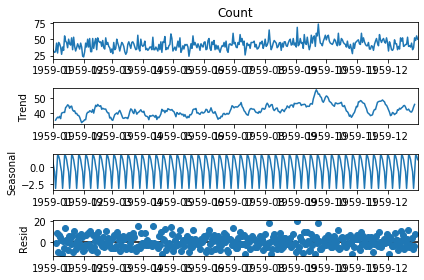

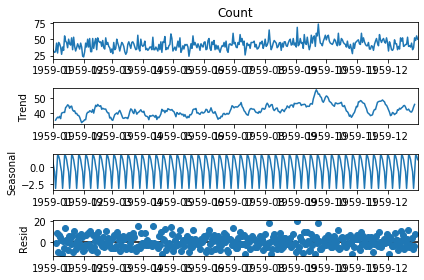

In [158]:
# Посмотреть из чего складывается наш ряд "Daily total female births in California". 
sm.tsa.seasonal_decompose(female_births.set_index(pd.DatetimeIndex(female_births['Date']))['Count']).plot()

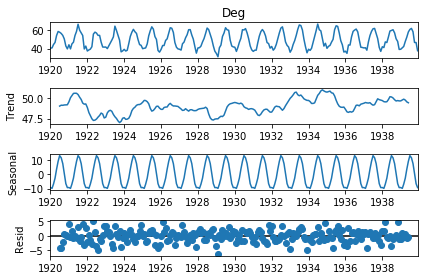

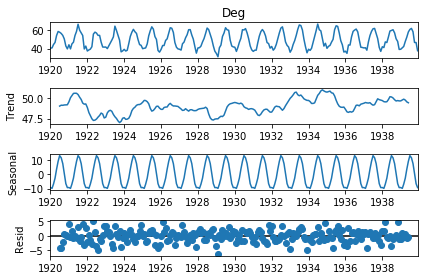

In [159]:
# Посмотреть из чего складывается наш ряд "Mean monthly air temperature (Deg. F) Nottingham Castle"
sm.tsa.seasonal_decompose(mean_monthly_temp.set_index(pd.DatetimeIndex(mean_monthly_temp['Month']))['Deg']).plot()

In [160]:
# Удаляем стационарные временные ряды из словаря
del all_series['Mean monthly air temperature (Deg. F) Nottingham Castle']
del all_series['Daily total female births in California']

Results of Dickey-Fuller Test:
Eсть единичные корни, ряд не стационарен
Test Statistic                 -2.587970
p-value                         0.095509
#Lags Used                     12.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64
Results of Dickey-Fuller Test:
Eдиничных корней нет, ряд стационарен
Test Statistic                -7.428564e+00
p-value                        6.450795e-11
#Lags Used                     1.000000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64
Results of Dickey-Fuller Test:
Eсть единичные корни, ряд не стационарен
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.0

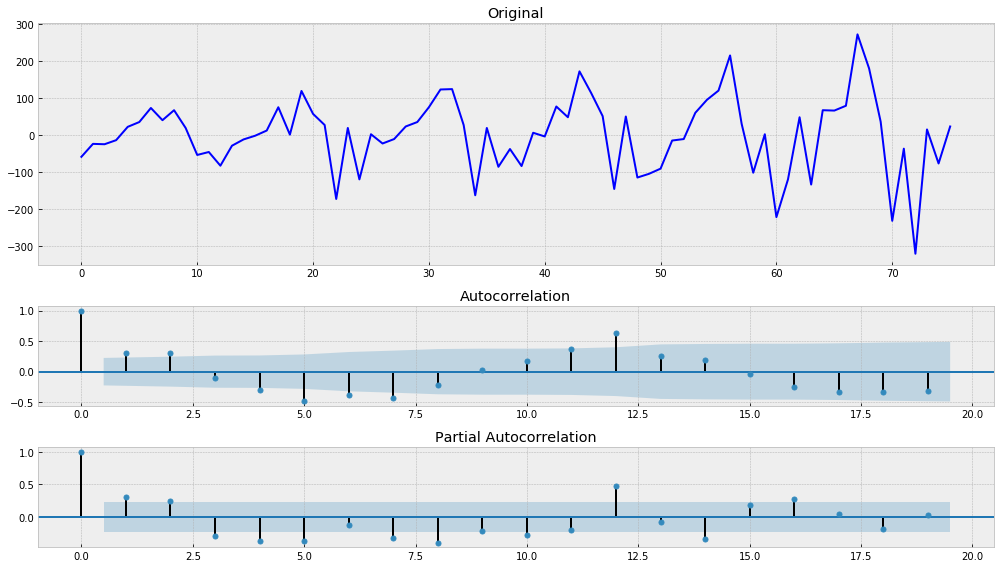

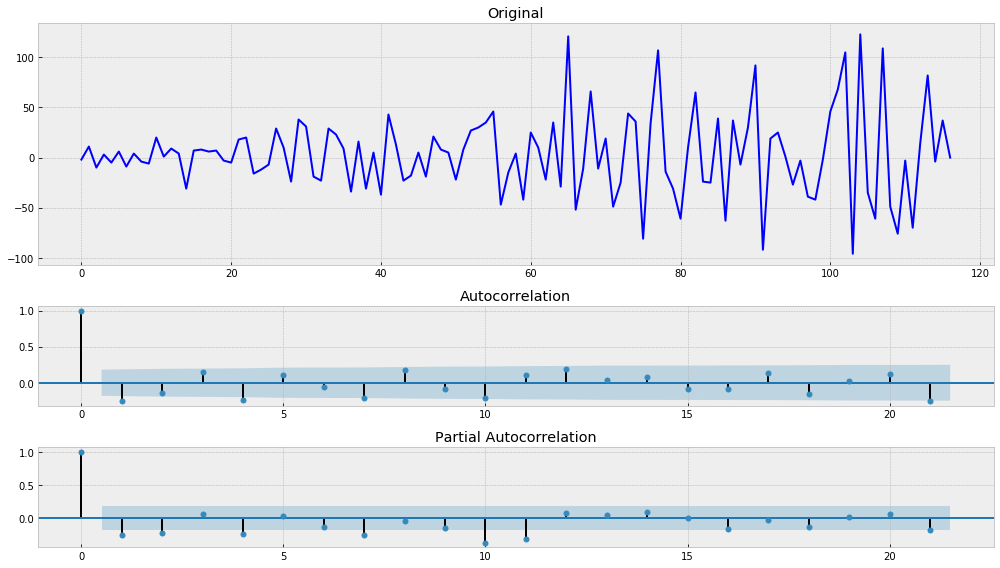

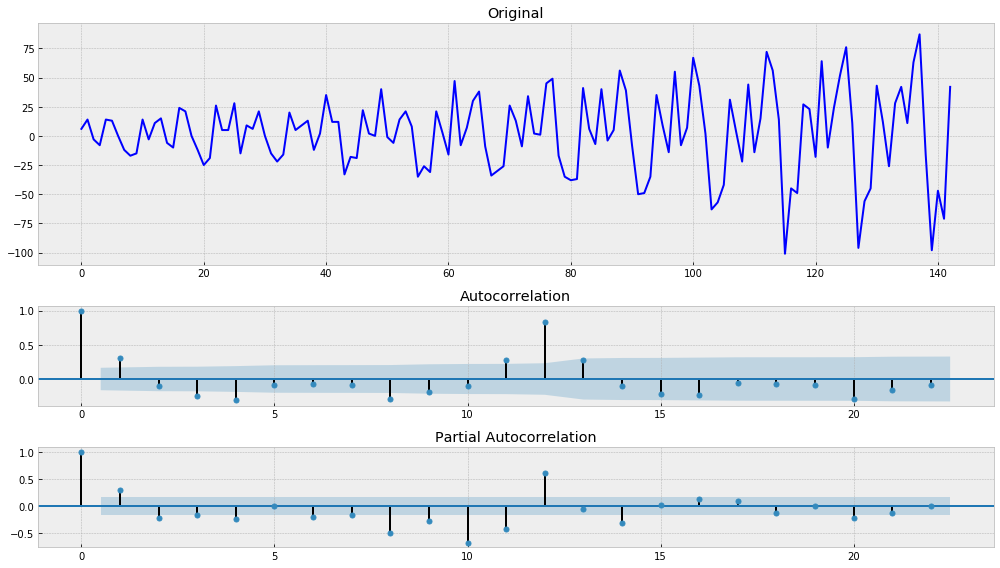

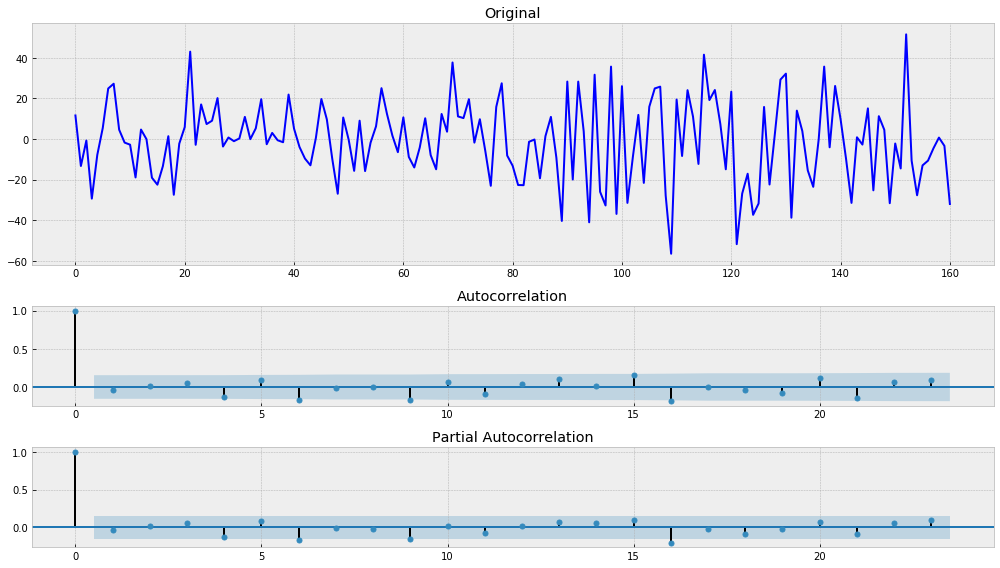

In [181]:
# Убираем тренд дифференцированием
for i, key in enumerate(all_series.keys()):
    series = difference(all_series[key])
    tsplot(series)

In [183]:
# Удаляем стационарные временные ряды из словаря
del all_series['Monthly Boston armed robberies']
del all_series['Weekly closings of the Dow-Jones industrial average']

In [206]:
series, lmbd_opt = boxcox(all_series['Monthly sales of company X'])

Results of Dickey-Fuller Test:
Eдиничных корней нет, ряд стационарен
Test Statistic                -7.447056e+00
p-value                        5.801016e-11
#Lags Used                     1.000000e+01
Number of Observations Used    6.300000e+01
Critical Value (1%)           -3.538695e+00
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
dtype: float64


C:\Users\korshunova_av\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


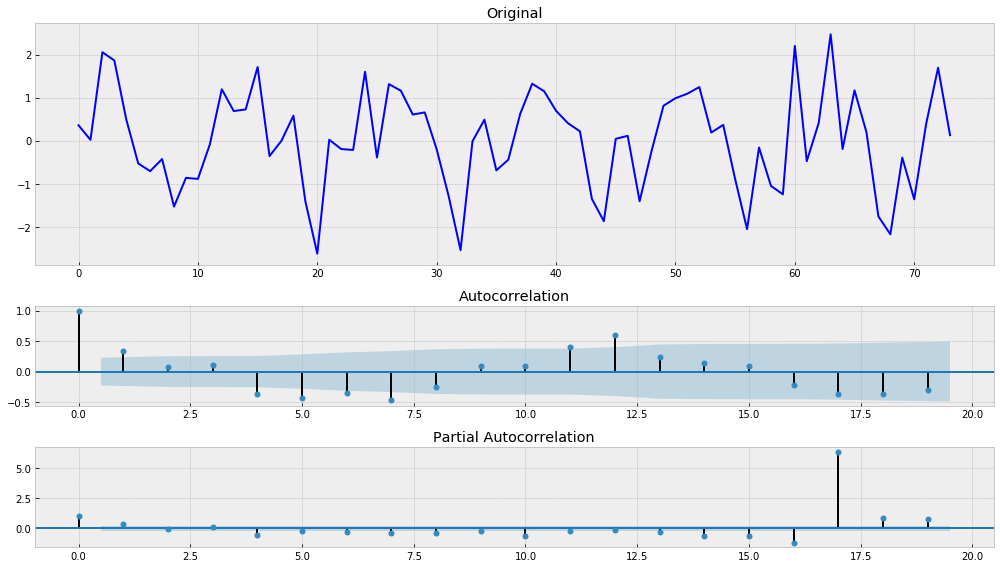

In [207]:
series = boxcox(all_series['Monthly sales of company X'], lmbd_opt)
series = difference(series)
series = difference(series, 2)
tsplot(series)

Results of Dickey-Fuller Test:
Eдиничных корней нет, ряд стационарен
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


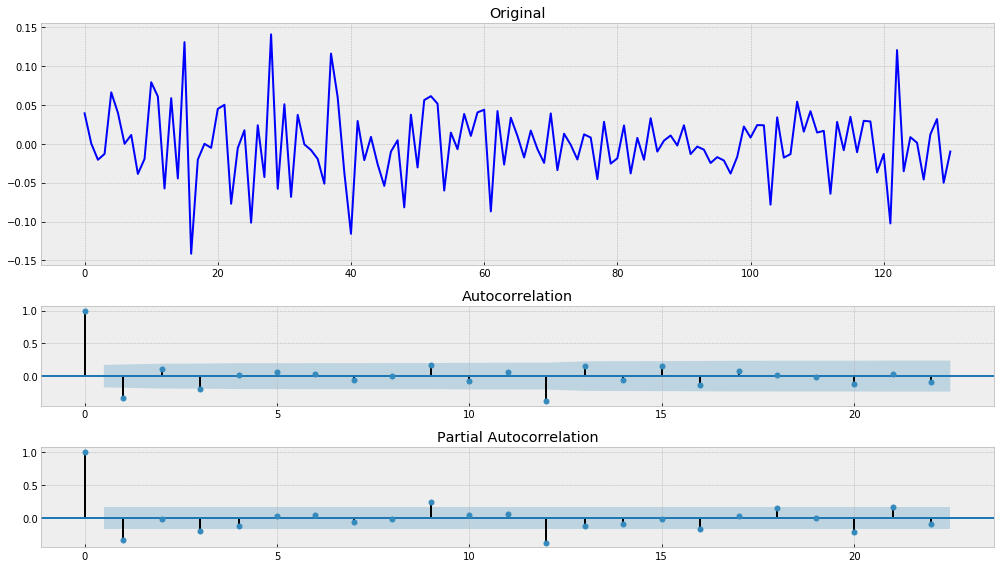

In [199]:
series = boxcox(all_series['International airline passengers: monthly totals in thousands'], 0)
series = difference(series)
series = difference(series, 12)
tsplot(series)

Results of Dickey-Fuller Test:
Eсть единичные корни, ряд не стационарен
Test Statistic                 -2.316045
p-value                         0.166845
#Lags Used                     10.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64
Results of Dickey-Fuller Test:
Eдиничных корней нет, ряд стационарен
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


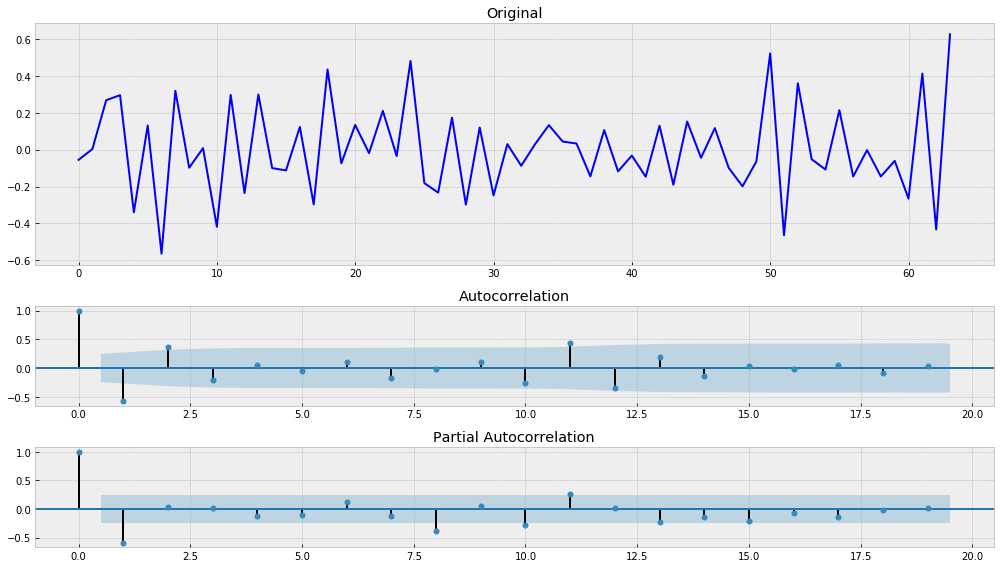

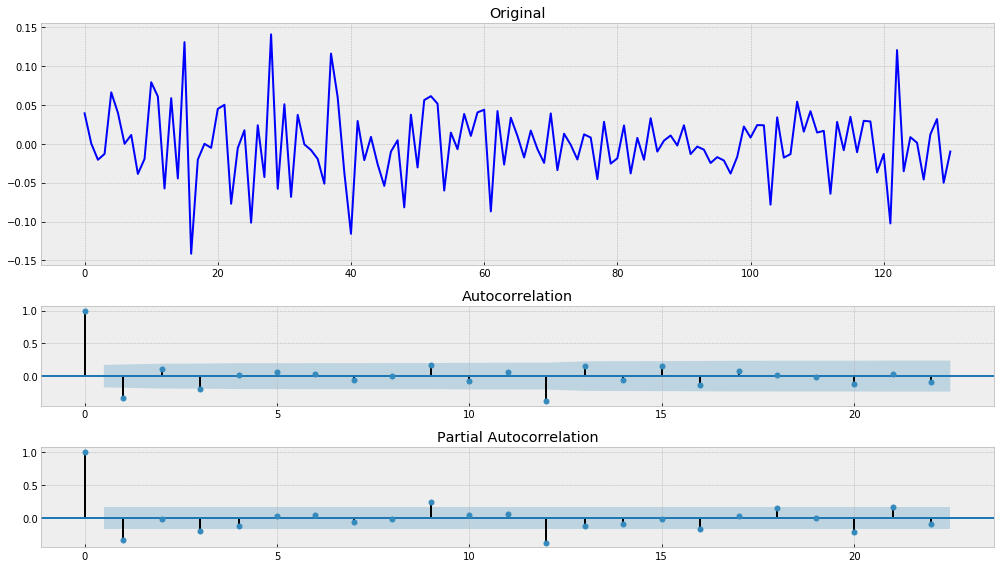

In [195]:
# На оставшихся временных рядах попробуем убрать сезонную составляющую. 
for i, key in enumerate(all_series.keys()):
    series = boxcox(all_series[key], 0)
    series = difference(series)
    series = difference(series, 12)
    tsplot(series)

Results of Dickey-Fuller Test:
Eсть единичные корни, ряд не стационарен
Test Statistic                 -2.587970
p-value                         0.095509
#Lags Used                     12.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64
Results of Dickey-Fuller Test:
Eдиничных корней нет, ряд стационарен
Test Statistic                -7.428564e+00
p-value                        6.450795e-11
#Lags Used                     1.000000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64
Results of Dickey-Fuller Test:
Eсть единичные корни, ряд не стационарен
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.0

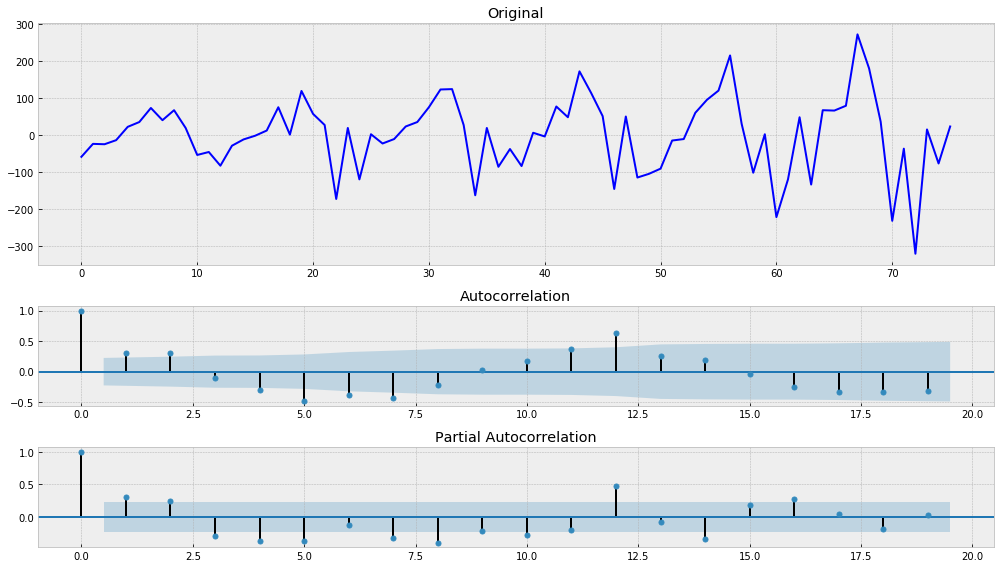

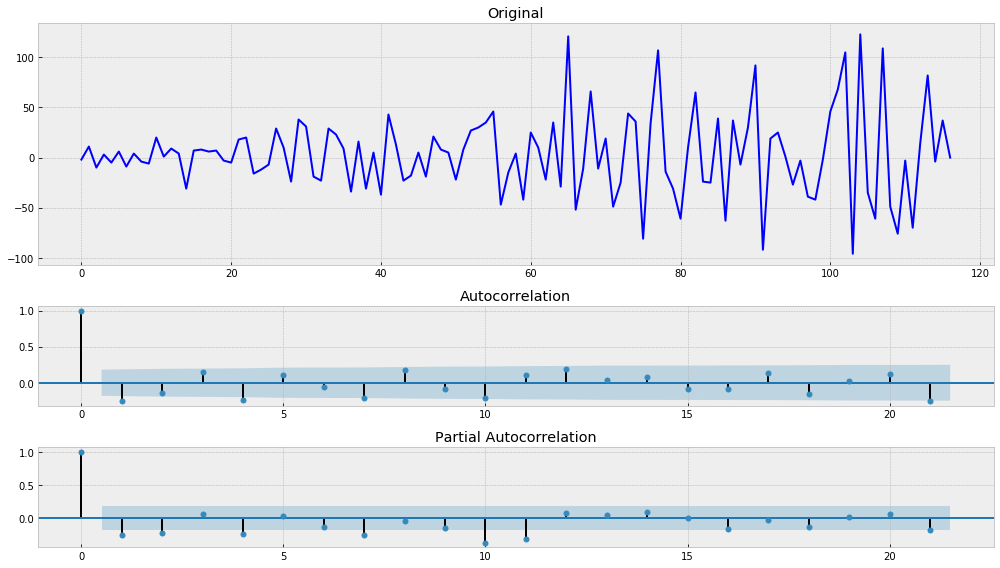

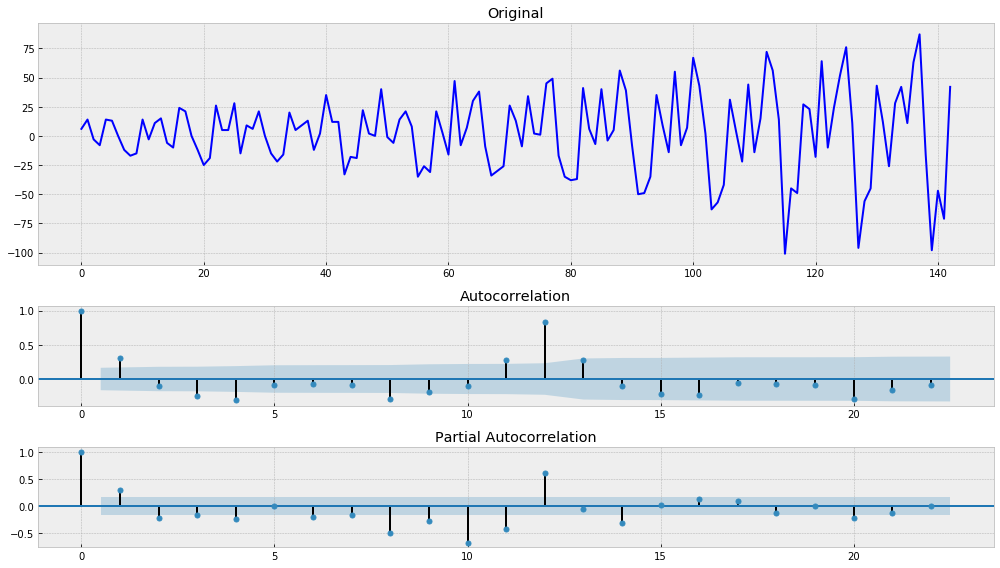

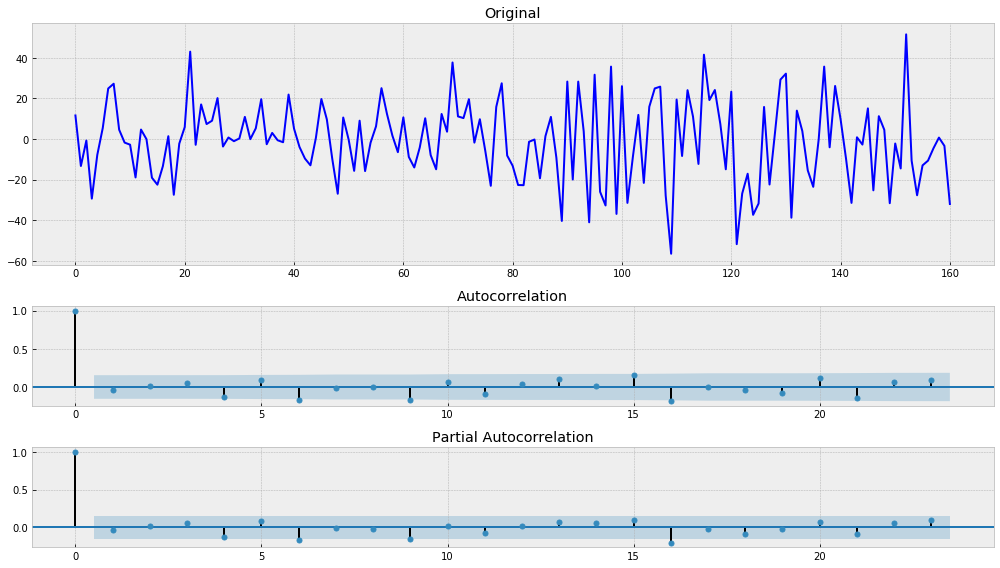

In [180]:
for i, key in enumerate(all_series.keys()):
    series = difference(all_series[key])
    tsplot(series)